In [11]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
from tensorflow import keras
from keras import layers

In [34]:
def myfunc(i):
  return np.sin(i[0]) + np.cos(i[1])

# train_data = [[x, y] for x in np.linspace(-5, 5, 1000) for y in np.linspace(-5, 5, 1000)]
# train_targets = [myfunc(i) for i in train_data]
# print(train_data[0])
# print(train_data[1])
# print(train_targets[0])
# print(train_targets[1])

def run(layers_generator, np_func, train_bound = 1, number_of_train_points = 500, test_bound = 1,
        number_of_test_points = 500, number_of_iterations = 20, batch_size = 256):
  train_data = np.array([[x, y] for x in np.linspace(-1 * train_bound, train_bound, number_of_train_points) for y in np.linspace(-1 * train_bound, train_bound, number_of_train_points)], dtype=float)
  train_targets = np.array([np_func(i) for i in train_data], dtype=float)
  train_data = tensorflow.expand_dims(train_data, axis=-1)

  test_data = np.array([[x, y] for x in np.linspace(-1 * test_bound, test_bound, number_of_test_points) for y in np.linspace(-1 * test_bound, test_bound, number_of_test_points)], dtype=float)
  test_targets = np.array([np_func(i) for i in test_data], dtype=float)
  test_data = tensorflow.expand_dims(test_data, axis=-1)

  model = keras.Sequential(layers_generator())
  model.compile(optimizer="adam", loss="mse", metrics=["mae"])
  if batch_size == 0:
    history = model.fit(train_data, train_targets, epochs = number_of_iterations)
  else:
    history = model.fit(train_data, train_targets, epochs = number_of_iterations, batch_size = batch_size)
  test_mse, test_mae = model.evaluate(test_data, test_targets)
  print(test_mae)

  plt.plot(history.history['loss'])
  plt.show()
  return model, history, test_mse, test_mae



Epoch 1/10
489/489 [==============================] - 2s 4ms/step - loss: 0.0712 - mae: 0.1257
Epoch 2/10
489/489 [==============================] - 2s 4ms/step - loss: 7.3162e-04 - mae: 0.0216
Epoch 3/10
489/489 [==============================] - 2s 4ms/step - loss: 3.2772e-04 - mae: 0.0142
Epoch 4/10
489/489 [==============================] - 2s 4ms/step - loss: 1.3345e-04 - mae: 0.0088
Epoch 5/10
489/489 [==============================] - 2s 4ms/step - loss: 6.8662e-05 - mae: 0.0063
Epoch 6/10
489/489 [==============================] - 2s 4ms/step - loss: 4.9537e-05 - mae: 0.0055
Epoch 7/10
489/489 [==============================] - 2s 4ms/step - loss: 4.1432e-05 - mae: 0.0051
Epoch 8/10
489/489 [==============================] - 2s 4ms/step - loss: 3.5476e-05 - mae: 0.0048
Epoch 9/10
489/489 [==============================] - 2s 4ms/step - loss: 3.2811e-05 - mae: 0.0046
Epoch 10/10
7813/7813 [==============================] - 23s 3ms/step - loss: 2.9421e-05 - mae: 0.0043
0.00432681

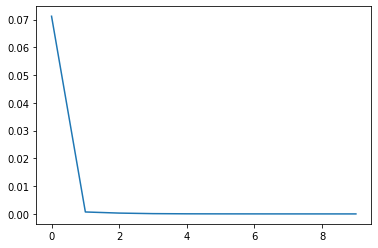

In [39]:
model, history, test_mse, test_mae =run(lambda: [layers.Dense(25, input_dim = 2), layers.Dense(25, activation="relu"), layers.Dense(1)], myfunc, batch_size = 512, number_of_iterations = 10)

In [40]:
print(test_mse)

for i in np.linspace(-1, 1, 5):
  for j in np.linspace(-1, 1, 5):
    print("(i = " + str(i) + ", j = " + str(j) + ") ==> Real: " + str(myfunc([i, j])))
    print("(i = " + str(i) + ", j = " + str(j) + ") ==> Pred: " + str(model.predict(np.array([[i, j]]))[0]))


2.9420520149869844e-05
(i = -1.0, j = -1.0) ==> Real: -0.30116867893975674
(i = -1.0, j = -1.0) ==> Pred: [-0.29004833]
(i = -1.0, j = -0.5) ==> Real: 0.036111577082476254
(i = -1.0, j = -0.5) ==> Pred: [0.02917898]
(i = -1.0, j = 0.0) ==> Real: 0.1585290151921035
(i = -1.0, j = 0.0) ==> Pred: [0.15783164]
(i = -1.0, j = 0.5) ==> Real: 0.036111577082476254
(i = -1.0, j = 0.5) ==> Pred: [0.02870742]
(i = -1.0, j = 1.0) ==> Real: -0.30116867893975674
(i = -1.0, j = 1.0) ==> Pred: [-0.29182234]
(i = -0.5, j = -1.0) ==> Real: 0.06087676726393676
(i = -0.5, j = -1.0) ==> Pred: [0.06748068]
(i = -0.5, j = -0.5) ==> Real: 0.39815702328616975
(i = -0.5, j = -0.5) ==> Pred: [0.39897648]
(i = -0.5, j = 0.0) ==> Real: 0.520574461395797
(i = -0.5, j = 0.0) ==> Pred: [0.52353054]
(i = -0.5, j = 0.5) ==> Real: 0.39815702328616975
(i = -0.5, j = 0.5) ==> Pred: [0.39911073]
(i = -0.5, j = 1.0) ==> Real: 0.06087676726393676
(i = -0.5, j = 1.0) ==> Pred: [0.07041331]
(i = 0.0, j = -1.0) ==> Real: 0.5403

Epoch 1/10
489/489 [==============================] - 2s 4ms/step - loss: 0.1894 - mae: 0.3115
Epoch 2/10
489/489 [==============================] - 2s 4ms/step - loss: 0.0090 - mae: 0.0731
Epoch 3/10
489/489 [==============================] - 2s 4ms/step - loss: 0.0020 - mae: 0.0347
Epoch 4/10
489/489 [==============================] - 2s 4ms/step - loss: 0.0010 - mae: 0.0260
Epoch 5/10
489/489 [==============================] - 2s 4ms/step - loss: 7.3528e-04 - mae: 0.0219
Epoch 6/10
489/489 [==============================] - 2s 4ms/step - loss: 5.7704e-04 - mae: 0.0195
Epoch 7/10
489/489 [==============================] - 2s 4ms/step - loss: 4.2537e-04 - mae: 0.0167
Epoch 8/10
489/489 [==============================] - 2s 4ms/step - loss: 3.0859e-04 - mae: 0.0141
Epoch 9/10
489/489 [==============================] - 2s 4ms/step - loss: 2.6857e-04 - mae: 0.0131
Epoch 10/10
7813/7813 [==============================] - 24s 3ms/step - loss: 2.3741e-04 - mae: 0.0125
0.012477145530283451


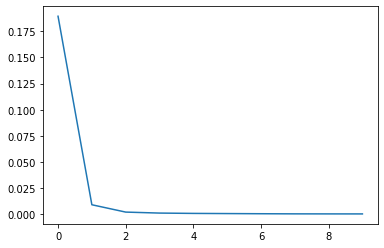

In [41]:
model, history, test_mse, test_mae =run(lambda: [layers.Dense(10, input_dim = 2, activation="relu"), layers.Dense(1)], myfunc, batch_size = 512, number_of_iterations = 10)

In [42]:
print(test_mse)

for i in np.linspace(-1, 1, 5):
  for j in np.linspace(-1, 1, 5):
    print("(i = " + str(i) + ", j = " + str(j) + ") ==> Real: " + str(myfunc([i, j])))
    print("(i = " + str(i) + ", j = " + str(j) + ") ==> Pred: " + str(model.predict(np.array([[i, j]]))[0]))


0.00023741282348055393
(i = -1.0, j = -1.0) ==> Real: -0.30116867893975674
(i = -1.0, j = -1.0) ==> Pred: [-0.26501215]
(i = -1.0, j = -0.5) ==> Real: 0.036111577082476254
(i = -1.0, j = -0.5) ==> Pred: [0.02390137]
(i = -1.0, j = 0.0) ==> Real: 0.1585290151921035
(i = -1.0, j = 0.0) ==> Pred: [0.14851281]
(i = -1.0, j = 0.5) ==> Real: 0.036111577082476254
(i = -1.0, j = 0.5) ==> Pred: [0.02852799]
(i = -1.0, j = 1.0) ==> Real: -0.30116867893975674
(i = -1.0, j = 1.0) ==> Pred: [-0.2309555]
(i = -0.5, j = -1.0) ==> Real: 0.06087676726393676
(i = -0.5, j = -1.0) ==> Pred: [0.05971612]
(i = -0.5, j = -0.5) ==> Real: 0.39815702328616975
(i = -0.5, j = -0.5) ==> Pred: [0.38649613]
(i = -0.5, j = 0.0) ==> Real: 0.520574461395797
(i = -0.5, j = 0.0) ==> Pred: [0.49827218]
(i = -0.5, j = 0.5) ==> Real: 0.39815702328616975
(i = -0.5, j = 0.5) ==> Pred: [0.3852567]
(i = -0.5, j = 1.0) ==> Real: 0.06087676726393676
(i = -0.5, j = 1.0) ==> Pred: [0.08387682]
(i = 0.0, j = -1.0) ==> Real: 0.540302

Epoch 1/2
489/489 [==============================] - 2s 4ms/step - loss: 0.1837 - mae: 0.2681
Epoch 2/2
7813/7813 [==============================] - 23s 3ms/step - loss: 0.0023 - mae: 0.0364
0.036442309617996216


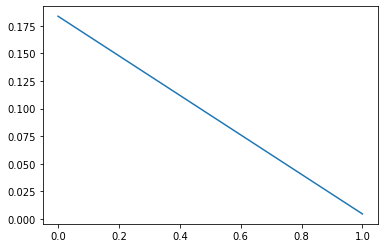

In [43]:
model, history, test_mse, test_mae =run(lambda: [layers.Dense(10, input_dim = 2, activation="relu"), layers.Dense(1)], myfunc, batch_size = 512, number_of_iterations = 2)

In [44]:
print(test_mse)

for i in np.linspace(-1, 1, 5):
  for j in np.linspace(-1, 1, 5):
    print("(i = " + str(i) + ", j = " + str(j) + ") ==> Real: " + str(myfunc([i, j])))
    print("(i = " + str(i) + ", j = " + str(j) + ") ==> Pred: " + str(model.predict(np.array([[i, j]]))[0]))


0.0022514972370117903
(i = -1.0, j = -1.0) ==> Real: -0.30116867893975674
(i = -1.0, j = -1.0) ==> Pred: [-0.08802713]
(i = -1.0, j = -0.5) ==> Real: 0.036111577082476254
(i = -1.0, j = -0.5) ==> Pred: [0.02154879]
(i = -1.0, j = 0.0) ==> Real: 0.1585290151921035
(i = -1.0, j = 0.0) ==> Pred: [0.13801828]
(i = -1.0, j = 0.5) ==> Real: 0.036111577082476254
(i = -1.0, j = 0.5) ==> Pred: [0.01421794]
(i = -1.0, j = 1.0) ==> Real: -0.30116867893975674
(i = -1.0, j = 1.0) ==> Pred: [-0.17341915]
(i = -0.5, j = -1.0) ==> Real: 0.06087676726393676
(i = -0.5, j = -1.0) ==> Pred: [0.21437642]
(i = -0.5, j = -0.5) ==> Real: 0.39815702328616975
(i = -0.5, j = -0.5) ==> Pred: [0.33659595]
(i = -0.5, j = 0.0) ==> Real: 0.520574461395797
(i = -0.5, j = 0.0) ==> Pred: [0.50998557]
(i = -0.5, j = 0.5) ==> Real: 0.39815702328616975
(i = -0.5, j = 0.5) ==> Pred: [0.38001662]
(i = -0.5, j = 1.0) ==> Real: 0.06087676726393676
(i = -0.5, j = 1.0) ==> Pred: [0.13368127]
(i = 0.0, j = -1.0) ==> Real: 0.54030

Epoch 1/2
489/489 [==============================] - 2s 4ms/step - loss: 0.1441 - mae: 0.2482
Epoch 2/2
7813/7813 [==============================] - 23s 3ms/step - loss: 0.1236 - mae: 0.2580
0.2580191493034363


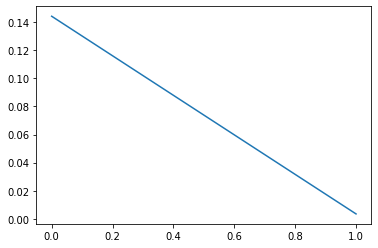

In [45]:
model, history, test_mse, test_mae =run(lambda: [layers.Dense(10, input_dim = 2, activation="relu"), layers.Dense(1)], myfunc, batch_size = 512, number_of_iterations = 2, train_bound=0.5)

In [46]:
print(test_mse)

for i in np.linspace(-1, 1, 5):
  for j in np.linspace(-1, 1, 5):
    print("(i = " + str(i) + ", j = " + str(j) + ") ==> Real: " + str(myfunc([i, j])))
    print("(i = " + str(i) + ", j = " + str(j) + ") ==> Pred: " + str(model.predict(np.array([[i, j]]))[0]))


0.12359391897916794
(i = -1.0, j = -1.0) ==> Real: -0.30116867893975674
(i = -1.0, j = -1.0) ==> Pred: [0.4797837]
(i = -1.0, j = -0.5) ==> Real: 0.036111577082476254
(i = -1.0, j = -0.5) ==> Pred: [0.28403568]
(i = -1.0, j = 0.0) ==> Real: 0.1585290151921035
(i = -1.0, j = 0.0) ==> Pred: [0.43198347]
(i = -1.0, j = 0.5) ==> Real: 0.036111577082476254
(i = -1.0, j = 0.5) ==> Pred: [0.6759611]
(i = -1.0, j = 1.0) ==> Real: -0.30116867893975674
(i = -1.0, j = 1.0) ==> Pred: [0.9204334]
(i = -0.5, j = -1.0) ==> Real: 0.06087676726393676
(i = -0.5, j = -1.0) ==> Pred: [0.77331764]
(i = -0.5, j = -0.5) ==> Real: 0.39815702328616975
(i = -0.5, j = -0.5) ==> Pred: [0.51975334]
(i = -0.5, j = 0.0) ==> Real: 0.520574461395797
(i = -0.5, j = 0.0) ==> Pred: [0.49779415]
(i = -0.5, j = 0.5) ==> Real: 0.39815702328616975
(i = -0.5, j = 0.5) ==> Pred: [0.62752557]
(i = -0.5, j = 1.0) ==> Real: 0.06087676726393676
(i = -0.5, j = 1.0) ==> Pred: [0.89367425]
(i = 0.0, j = -1.0) ==> Real: 0.540302305868

Epoch 1/2
1/1 [==============================] - 1s 870ms/step - loss: 1.0818 - mae: 0.8529
Epoch 2/2
7813/7813 [==============================] - 24s 3ms/step - loss: 1.0509 - mae: 0.8537
0.8537468314170837


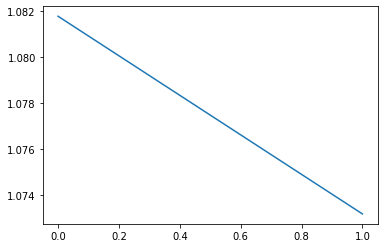

In [47]:
model, history, test_mse, test_mae =run(lambda: [layers.Dense(10, input_dim = 2, activation="relu"), layers.Dense(1)], myfunc, batch_size = 512, number_of_iterations = 2, number_of_train_points = 10)

In [49]:
print(test_mse)

for i in np.linspace(-1, 1, 5):
  for j in np.linspace(-1, 1, 5):
    print("(i = " + str(i) + ", j = " + str(j) + ") ==> Real: " + str(myfunc([i, j])))
    print("(i = " + str(i) + ", j = " + str(j) + ") ==> Pred: " + str(model.predict(np.array([[i, j]]))[0]))


1.0508798360824585
(i = -1.0, j = -1.0) ==> Real: -0.30116867893975674
(i = -1.0, j = -1.0) ==> Pred: [0.10308827]
(i = -1.0, j = -0.5) ==> Real: 0.036111577082476254
(i = -1.0, j = -0.5) ==> Pred: [0.05821675]
(i = -1.0, j = 0.0) ==> Real: 0.1585290151921035
(i = -1.0, j = 0.0) ==> Pred: [0.10720484]
(i = -1.0, j = 0.5) ==> Real: 0.036111577082476254
(i = -1.0, j = 0.5) ==> Pred: [0.17964509]
(i = -1.0, j = 1.0) ==> Real: -0.30116867893975674
(i = -1.0, j = 1.0) ==> Pred: [0.1844792]
(i = -0.5, j = -1.0) ==> Real: 0.06087676726393676
(i = -0.5, j = -1.0) ==> Pred: [0.07519619]
(i = -0.5, j = -0.5) ==> Real: 0.39815702328616975
(i = -0.5, j = -0.5) ==> Pred: [0.05424711]
(i = -0.5, j = 0.0) ==> Real: 0.520574461395797
(i = -0.5, j = 0.0) ==> Pred: [0.05526105]
(i = -0.5, j = 0.5) ==> Real: 0.39815702328616975
(i = -0.5, j = 0.5) ==> Pred: [0.09424877]
(i = -0.5, j = 1.0) ==> Real: 0.06087676726393676
(i = -0.5, j = 1.0) ==> Pred: [0.02080375]
(i = 0.0, j = -1.0) ==> Real: 0.54030230586

In [50]:
def myfunc2(i):
  return i[0] ** 2 + i[1]

Epoch 1/10
489/489 [==============================] - 2s 4ms/step - loss: 0.0146 - mae: 0.0765
Epoch 2/10
489/489 [==============================] - 2s 4ms/step - loss: 0.0013 - mae: 0.0280
Epoch 3/10
489/489 [==============================] - 2s 4ms/step - loss: 2.2070e-04 - mae: 0.0116
Epoch 4/10
489/489 [==============================] - 2s 4ms/step - loss: 1.0686e-04 - mae: 0.0081
Epoch 5/10
489/489 [==============================] - 2s 4ms/step - loss: 7.9369e-05 - mae: 0.0070
Epoch 6/10
489/489 [==============================] - 2s 4ms/step - loss: 6.2858e-05 - mae: 0.0062
Epoch 7/10
489/489 [==============================] - 2s 4ms/step - loss: 5.1876e-05 - mae: 0.0057
Epoch 8/10
489/489 [==============================] - 2s 4ms/step - loss: 4.3762e-05 - mae: 0.0052
Epoch 9/10
489/489 [==============================] - 2s 4ms/step - loss: 3.8518e-05 - mae: 0.0050
Epoch 10/10
7813/7813 [==============================] - 22s 3ms/step - loss: 3.3578e-05 - mae: 0.0047
0.004695448558

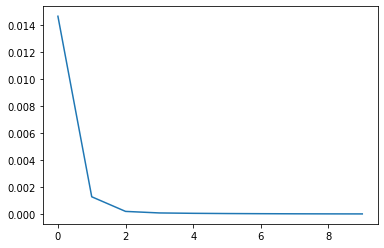

In [51]:
model, history, test_mse, test_mae =run(lambda: [layers.Dense(25, input_dim = 2), layers.Dense(25, activation="relu"), layers.Dense(1)], myfunc2, batch_size = 512, number_of_iterations = 10)

In [52]:
print(test_mse)

for i in np.linspace(-1, 1, 5):
  for j in np.linspace(-1, 1, 5):
    print("(i = " + str(i) + ", j = " + str(j) + ") ==> Real: " + str(myfunc2([i, j])))
    print("(i = " + str(i) + ", j = " + str(j) + ") ==> Pred: " + str(model.predict(np.array([[i, j]]))[0]))


3.357787863933481e-05
(i = -1.0, j = -1.0) ==> Real: 0.0
(i = -1.0, j = -1.0) ==> Pred: [-0.01570326]
(i = -1.0, j = -0.5) ==> Real: 0.5
(i = -1.0, j = -0.5) ==> Pred: [0.48937052]
(i = -1.0, j = 0.0) ==> Real: 1.0
(i = -1.0, j = 0.0) ==> Pred: [0.9897319]
(i = -1.0, j = 0.5) ==> Real: 1.5
(i = -1.0, j = 0.5) ==> Pred: [1.489042]
(i = -1.0, j = 1.0) ==> Real: 2.0
(i = -1.0, j = 1.0) ==> Pred: [1.9855174]
(i = -0.5, j = -1.0) ==> Real: -0.75
(i = -0.5, j = -1.0) ==> Pred: [-0.74755085]
(i = -0.5, j = -0.5) ==> Real: -0.25
(i = -0.5, j = -0.5) ==> Pred: [-0.24720217]
(i = -0.5, j = 0.0) ==> Real: 0.25
(i = -0.5, j = 0.0) ==> Pred: [0.25181592]
(i = -0.5, j = 0.5) ==> Real: 0.75
(i = -0.5, j = 0.5) ==> Pred: [0.7542345]
(i = -0.5, j = 1.0) ==> Real: 1.25
(i = -0.5, j = 1.0) ==> Pred: [1.2451081]
(i = 0.0, j = -1.0) ==> Real: -1.0
(i = 0.0, j = -1.0) ==> Pred: [-0.99782884]
(i = 0.0, j = -0.5) ==> Real: -0.5
(i = 0.0, j = -0.5) ==> Pred: [-0.49733227]
(i = 0.0, j = 0.0) ==> Real: 0.0
(i = 

Epoch 1/10
489/489 [==============================] - 2s 4ms/step - loss: 0.1218 - mae: 0.2473
Epoch 2/10
489/489 [==============================] - 2s 4ms/step - loss: 0.0080 - mae: 0.0704
Epoch 3/10
489/489 [==============================] - 2s 5ms/step - loss: 0.0040 - mae: 0.0506
Epoch 4/10
489/489 [==============================] - 3s 7ms/step - loss: 0.0022 - mae: 0.0376
Epoch 5/10
489/489 [==============================] - 2s 5ms/step - loss: 0.0014 - mae: 0.0303
Epoch 6/10
489/489 [==============================] - 2s 4ms/step - loss: 0.0010 - mae: 0.0260
Epoch 7/10
489/489 [==============================] - 2s 5ms/step - loss: 8.3366e-04 - mae: 0.0233
Epoch 8/10
489/489 [==============================] - 3s 6ms/step - loss: 6.8667e-04 - mae: 0.0213
Epoch 9/10
489/489 [==============================] - 2s 4ms/step - loss: 5.9065e-04 - mae: 0.0198
Epoch 10/10
7813/7813 [==============================] - 22s 3ms/step - loss: 5.0076e-04 - mae: 0.0182
0.01817557029426098


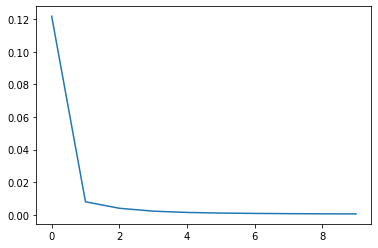

In [53]:
model, history, test_mse, test_mae =run(lambda: [layers.Dense(10, input_dim = 2, activation="relu"), layers.Dense(1)], myfunc2, batch_size = 512, number_of_iterations = 10)

In [54]:
print(test_mse)

for i in np.linspace(-1, 1, 5):
  for j in np.linspace(-1, 1, 5):
    print("(i = " + str(i) + ", j = " + str(j) + ") ==> Real: " + str(myfunc2([i, j])))
    print("(i = " + str(i) + ", j = " + str(j) + ") ==> Pred: " + str(model.predict(np.array([[i, j]]))[0]))

0.0005007627769373357
(i = -1.0, j = -1.0) ==> Real: 0.0
(i = -1.0, j = -1.0) ==> Pred: [-0.05375022]
(i = -1.0, j = -0.5) ==> Real: 0.5
(i = -1.0, j = -0.5) ==> Pred: [0.4643245]
(i = -1.0, j = 0.0) ==> Real: 1.0
(i = -1.0, j = 0.0) ==> Pred: [0.96584076]
(i = -1.0, j = 0.5) ==> Real: 1.5
(i = -1.0, j = 0.5) ==> Pred: [1.4673572]
(i = -1.0, j = 1.0) ==> Real: 2.0
(i = -1.0, j = 1.0) ==> Pred: [1.9269063]
(i = -0.5, j = -1.0) ==> Real: -0.75
(i = -0.5, j = -1.0) ==> Pred: [-0.71463627]
(i = -0.5, j = -0.5) ==> Real: -0.25
(i = -0.5, j = -0.5) ==> Pred: [-0.27435318]
(i = -0.5, j = 0.0) ==> Real: 0.25
(i = -0.5, j = 0.0) ==> Pred: [0.21298179]
(i = -0.5, j = 0.5) ==> Real: 0.75
(i = -0.5, j = 0.5) ==> Pred: [0.74568546]
(i = -0.5, j = 1.0) ==> Real: 1.25
(i = -0.5, j = 1.0) ==> Pred: [1.2742882]
(i = 0.0, j = -1.0) ==> Real: -1.0
(i = 0.0, j = -1.0) ==> Pred: [-1.0191832]
(i = 0.0, j = -0.5) ==> Real: -0.5
(i = 0.0, j = -0.5) ==> Pred: [-0.4993524]
(i = 0.0, j = 0.0) ==> Real: 0.0
(i = 

Epoch 1/2
489/489 [==============================] - 2s 4ms/step - loss: 0.1676 - mae: 0.2976
Epoch 2/2
7813/7813 [==============================] - 22s 3ms/step - loss: 0.0057 - mae: 0.0608
0.06079697608947754


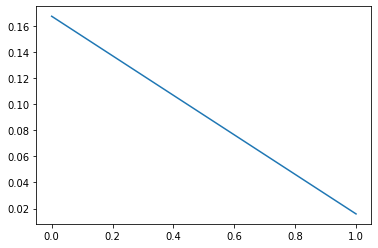

In [55]:
model, history, test_mse, test_mae =run(lambda: [layers.Dense(10, input_dim = 2, activation="relu"), layers.Dense(1)], myfunc2, batch_size = 512, number_of_iterations = 2)

In [56]:
print(test_mse)

for i in np.linspace(-1, 1, 5):
  for j in np.linspace(-1, 1, 5):
    print("(i = " + str(i) + ", j = " + str(j) + ") ==> Real: " + str(myfunc2([i, j])))
    print("(i = " + str(i) + ", j = " + str(j) + ") ==> Pred: " + str(model.predict(np.array([[i, j]]))[0]))

0.005744677037000656
(i = -1.0, j = -1.0) ==> Real: 0.0
(i = -1.0, j = -1.0) ==> Pred: [-0.09196024]
(i = -1.0, j = -0.5) ==> Real: 0.5
(i = -1.0, j = -0.5) ==> Pred: [0.39246714]
(i = -1.0, j = 0.0) ==> Real: 1.0
(i = -1.0, j = 0.0) ==> Pred: [0.8768945]
(i = -1.0, j = 0.5) ==> Real: 1.5
(i = -1.0, j = 0.5) ==> Pred: [1.3613219]
(i = -1.0, j = 1.0) ==> Real: 2.0
(i = -1.0, j = 1.0) ==> Pred: [1.7167073]
(i = -0.5, j = -1.0) ==> Real: -0.75
(i = -0.5, j = -1.0) ==> Pred: [-0.6611355]
(i = -0.5, j = -0.5) ==> Real: -0.25
(i = -0.5, j = -0.5) ==> Pred: [-0.17670809]
(i = -0.5, j = 0.0) ==> Real: 0.25
(i = -0.5, j = 0.0) ==> Pred: [0.30771935]
(i = -0.5, j = 0.5) ==> Real: 0.75
(i = -0.5, j = 0.5) ==> Pred: [0.7696759]
(i = -0.5, j = 1.0) ==> Real: 1.25
(i = -0.5, j = 1.0) ==> Pred: [1.2824214]
(i = 0.0, j = -1.0) ==> Real: -1.0
(i = 0.0, j = -1.0) ==> Pred: [-1.0102023]
(i = 0.0, j = -0.5) ==> Real: -0.5
(i = 0.0, j = -0.5) ==> Pred: [-0.65990156]
(i = 0.0, j = 0.0) ==> Real: 0.0
(i = 0.

Epoch 1/2
489/489 [==============================] - 2s 4ms/step - loss: 0.0051 - mae: 0.0363
Epoch 2/2
7813/7813 [==============================] - 24s 3ms/step - loss: 0.0300 - mae: 0.1171
0.11708980798721313


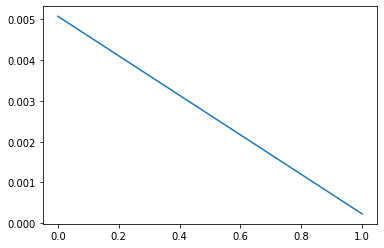

In [57]:
model, history, test_mse, test_mae =run(lambda: [layers.Dense(10, input_dim = 2, activation="relu"), layers.Dense(1)], myfunc2, batch_size = 512, number_of_iterations = 2, train_bound=0.5)

In [58]:
print(test_mse)

for i in np.linspace(-1, 1, 5):
  for j in np.linspace(-1, 1, 5):
    print("(i = " + str(i) + ", j = " + str(j) + ") ==> Real: " + str(myfunc2([i, j])))
    print("(i = " + str(i) + ", j = " + str(j) + ") ==> Pred: " + str(model.predict(np.array([[i, j]]))[0]))


0.029996372759342194
(i = -1.0, j = -1.0) ==> Real: 0.0
(i = -1.0, j = -1.0) ==> Pred: [-0.39433393]
(i = -1.0, j = -0.5) ==> Real: 0.5
(i = -1.0, j = -0.5) ==> Pred: [-0.00842019]
(i = -1.0, j = 0.0) ==> Real: 1.0
(i = -1.0, j = 0.0) ==> Pred: [0.49019948]
(i = -1.0, j = 0.5) ==> Real: 1.5
(i = -1.0, j = 0.5) ==> Pred: [0.994517]
(i = -1.0, j = 1.0) ==> Real: 2.0
(i = -1.0, j = 1.0) ==> Pred: [1.3934284]
(i = -0.5, j = -1.0) ==> Real: -0.75
(i = -0.5, j = -1.0) ==> Pred: [-0.6506801]
(i = -0.5, j = -0.5) ==> Real: -0.25
(i = -0.5, j = -0.5) ==> Pred: [-0.28266543]
(i = -0.5, j = 0.0) ==> Real: 0.25
(i = -0.5, j = 0.0) ==> Pred: [0.21595427]
(i = -0.5, j = 0.5) ==> Real: 0.75
(i = -0.5, j = 0.5) ==> Pred: [0.70053244]
(i = -0.5, j = 1.0) ==> Real: 1.25
(i = -0.5, j = 1.0) ==> Pred: [1.0994437]
(i = 0.0, j = -1.0) ==> Real: -1.0
(i = 0.0, j = -1.0) ==> Pred: [-0.7426326]
(i = 0.0, j = -0.5) ==> Real: -0.5
(i = 0.0, j = -0.5) ==> Pred: [-0.49880418]
(i = 0.0, j = 0.0) ==> Real: 0.0
(i = 

Epoch 1/2
1/1 [==============================] - 0s 450ms/step - loss: 1.4377 - mae: 0.9442
Epoch 2/2
7813/7813 [==============================] - 25s 3ms/step - loss: 1.0880 - mae: 0.8178
0.817809522151947


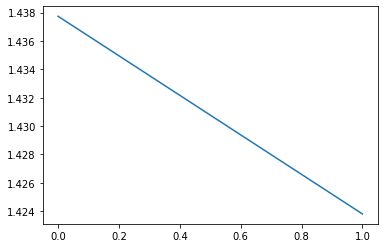

In [59]:
model, history, test_mse, test_mae =run(lambda: [layers.Dense(10, input_dim = 2, activation="relu"), layers.Dense(1)], myfunc2, batch_size = 512, number_of_iterations = 2, number_of_train_points = 10)

In [60]:
print(test_mse)

for i in np.linspace(-1, 1, 5):
  for j in np.linspace(-1, 1, 5):
    print("(i = " + str(i) + ", j = " + str(j) + ") ==> Real: " + str(myfunc2([i, j])))
    print("(i = " + str(i) + ", j = " + str(j) + ") ==> Pred: " + str(model.predict(np.array([[i, j]]))[0]))



1.087976098060608
(i = -1.0, j = -1.0) ==> Real: 0.0
(i = -1.0, j = -1.0) ==> Pred: [-0.8703831]
(i = -1.0, j = -0.5) ==> Real: 0.5
(i = -1.0, j = -0.5) ==> Pred: [-0.76232433]
(i = -1.0, j = 0.0) ==> Real: 1.0
(i = -1.0, j = 0.0) ==> Pred: [-0.7421243]
(i = -1.0, j = 0.5) ==> Real: 1.5
(i = -1.0, j = 0.5) ==> Pred: [-0.8397269]
(i = -1.0, j = 1.0) ==> Real: 2.0
(i = -1.0, j = 1.0) ==> Pred: [-1.044605]
(i = -0.5, j = -1.0) ==> Real: -0.75
(i = -0.5, j = -1.0) ==> Pred: [-0.61299527]
(i = -0.5, j = -0.5) ==> Real: -0.25
(i = -0.5, j = -0.5) ==> Pred: [-0.43099374]
(i = -0.5, j = 0.0) ==> Real: 0.25
(i = -0.5, j = 0.0) ==> Pred: [-0.36613652]
(i = -0.5, j = 0.5) ==> Real: 0.75
(i = -0.5, j = 0.5) ==> Pred: [-0.51765597]
(i = -0.5, j = 1.0) ==> Real: 1.25
(i = -0.5, j = 1.0) ==> Pred: [-0.79908013]
(i = 0.0, j = -1.0) ==> Real: -1.0
(i = 0.0, j = -1.0) ==> Pred: [-0.40581644]
(i = 0.0, j = -0.5) ==> Real: -0.5
(i = 0.0, j = -0.5) ==> Pred: [-0.20002116]
(i = 0.0, j = 0.0) ==> Real: 0.0
(